In [26]:
held_out = True # whether to use held out data

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as  np

import tests
import analysis_utils as utils

In [28]:
import importlib
importlib.reload(tests)
importlib.reload(utils)

<module 'analysis_utils' from '/home/appreciate/Dropbox (MIT)/btc-analysis/An-Experimental-Study-of-Cryptocurrency-Market-Dynamics/analysis_utils.py'>

# Reading Data

In [29]:
checks, interventions = utils.read_data(held_out)

155111 total confirmatory trials
620318 total confirmatory observations
217 coins
start: 2015-04-12 12:41:57
end: 2015-10-19 21:38:37
Coins traded:
 42, AC, ACOIN, AGS, ALF, ALN, AMC, ANC, APEX, ARCH, ARG, ARI, AUR, AXR, BCX, BEN, BET, BITB, BLK, BLU, BNCR, BOST, BQC, BTB, BTCD, BTE, BTG, BTM, BUK, CACH, CAIx, CANN, CAP, CASH, CAT, CBX, CCN, CIN, CINNI, CKC, CLAM, CLOAK, CLR, CMC, CNC, CNL, COMM, COOL, CRACK, CRAIG, CRC, CRYPT, CSC, DASH, DEM, DGB, DGC, DMD, DOGE, DOGED, DRKC, DSB, DT, DVC, EAC, EFL, ELC, EMC2, EMD, EXCL, EXE, EZC, FC2, FFC, FIBRE, FLT, FRAC, FRC, FRK, FST, FTC, GB, GDC, GLC, GLD, GLX, GLYPH, GML, GUE, HAL, HBN, HUC, HVC, HYP, ICB, IFC, IOC, IXC, JBS, JKC, JUDGE, KDC, KEY, KGC, LAB, LGD, LK7, LKY, LSD, LTB, LTC, LTCD, LTCX, LXC, LYC, MAX, MEC, MED, MIN, MINT, MN, MNC, MNE, MRY, MYR, MYST, MZC, NAN, NAUT, NAV, NBL, NEC, NET, NMB, NMC, NOBL, NRB, NRS, NVC, NXT, NYAN, OPAL, ORB, OSC, PHS, POT, PPC, PSEUD, PTS, PXC, PYC, QRK, RDD, RIPO, RPC, RT2, RYC, RZR, SAT2, SBC, SDC, 

In [30]:
checks = utils.expand_columns(checks, interventions)

In [31]:
daily_volume = utils.get_daily_volume(checks)

In [32]:
coin_data = utils.get_coin_data(checks)

In [33]:
print(checks.columns)
print(interventions.columns)

Index(['coin_name', 'coin_id', 'intervention_num', 'monitor_num', 'buy_state',
       'sell_state', 'buy_eats_block', 'sell_eats_block', 'condition', 'time',
       'volume_15', 'volume_30', 'volume_60', 'total_15', 'total_30',
       'total_60', 'volume', 'total', 'buy_volume_15', 'buy_volume_30',
       'buy_volume_60', 'buy_total_15', 'buy_total_30', 'buy_total_60',
       'buy_volume', 'buy_total', 'sell_volume_15', 'sell_volume_30',
       'sell_volume_60', 'sell_total_15', 'sell_total_30', 'sell_total_60',
       'sell_volume', 'sell_total', 'last_trade_type', 'last_trade_id',
       'last_trade_time', 'last_trade_quantity', 'last_trade_price',
       'last_trade_total', 'highest_buy_price', 'highest_buy_total',
       'highest_buy_quantity', 'lowest_sell_price', 'lowest_sell_total',
       'lowest_sell_quantity', 'ids', 'day', 'month', 'hour', 'minute',
       'day_of_week', 'weekday', 'humantimes', 'last_trade_buy',
       'last_trade_sell', 'last_trade_nonnull', 'spread', 'las

# Descriptive Statistics

In [34]:
len(checks)

620318

In [35]:
tests.print_descriptives(checks, daily_volume)

Mean daily BTC trading volume: 397.0411277446236
Minimum intervention size percentile: 0.0593123634043
Maximum intervention size percentile: 7.51203976507


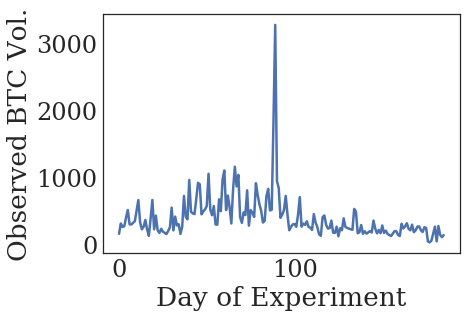

In [36]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white',  rc={"lines.linewidth": 2.5})
plt.plot(range(len(daily_volume)), daily_volume)
plt.xlabel('Day of Experiment')
plt.ylabel('Observed BTC Vol.')
plt.savefig('btc-vol-over-time.jpg', bbox_inches = 'tight')

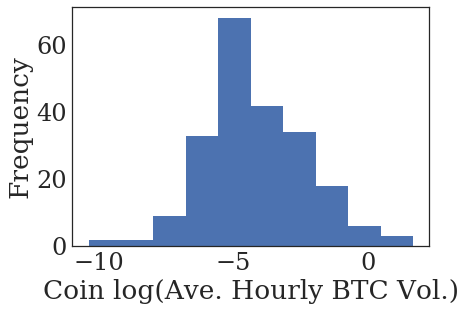

In [37]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white')
plt.hist(np.log(coin_data['tot']))
plt.xlabel('Coin log(Ave. Hourly BTC Vol.)')
plt.ylabel('Frequency')
plt.savefig('btc-vol-coin-hist.jpg', bbox_inches = 'tight')

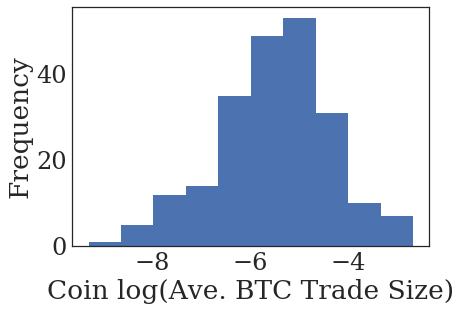

In [38]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white')
plt.hist(np.log(coin_data['size']))
plt.xlabel('Coin log(Ave. BTC Trade Size)')
plt.ylabel('Frequency')
plt.savefig('trade-size-coin-hist.jpg', bbox_inches = 'tight')

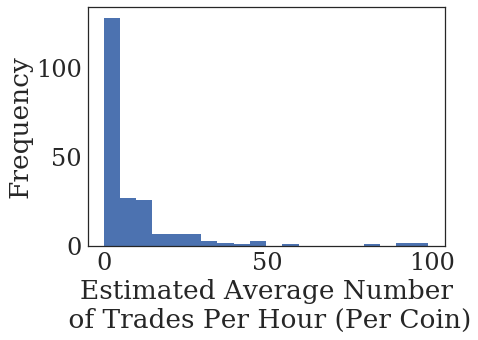

In [39]:
sns.set(context = 'paper', font_scale = 3, font='serif', style = 'white')
plt.hist(coin_data['counts'], 20)
plt.xlabel('Estimated Average Number\n of Trades Per Hour (Per Coin)')
plt.ylabel('Frequency')
plt.savefig('num-trades-coin-hist.jpg', bbox_inches = 'tight')

# Results

## Statistical Analysis

In [40]:
tests.run_ttests(checks)

Number of tests: 18
\begin{tabular}{|r|r|r|r|r|r|r|r|r|}
\hline
\textbf{Time} & \textbf{Condition} & \textbf{Dependent Var.} & \textbf{$n$ Control} & \textbf{$n$ Treat} & \textbf{Control Mean} & \textbf{Mean Effect} & \textbf{$t$-stat} & \textbf{$p$-value}\\\hline
15 Min. & Buy & Buy Prob. & 25483 & 25602 & 0.279 & 0.019 & 4.79 & 2.96e-05\\\hline
15 Min. & Buy & \% Buy Vol. & 24321 & 24313 & 0.290 & 0.017 & 4.40 & 1.97e-04\\\hline
15 Min. & Buy & Trade Prob. & 52050 & 51314 & 0.490 & 0.009 & 3.00 & 4.81e-02\\\hline
15 Min. & Sell & Sell Prob. & 25483 & 25987 & 0.721 & -0.006 & -1.44 & 1.00e+00\\\hline
15 Min. & Sell & \% Sell Vol. & 24321 & 24660 & 0.710 & -0.005 & -1.31 & 1.00e+00\\\hline
15 Min. & Sell & Trade Prob. & 52050 & 51727 & 0.490 & 0.013 & 4.12 & 6.71e-04\\\hline
30 Min. & Buy & Buy Prob. & 23647 & 23871 & 0.278 & 0.003 & 0.83 & 1.00e+00\\\hline
30 Min. & Buy & \% Buy Vol. & 23583 & 23802 & 0.291 & 0.005 & 1.33 & 1.00e+00\\\hline
30 Min. & Buy & Trade Prob. & 52049 & 51312 

In [41]:
results = tests.get_bootstrap_results(checks)

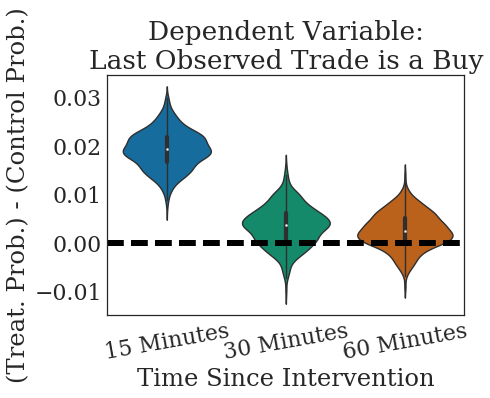

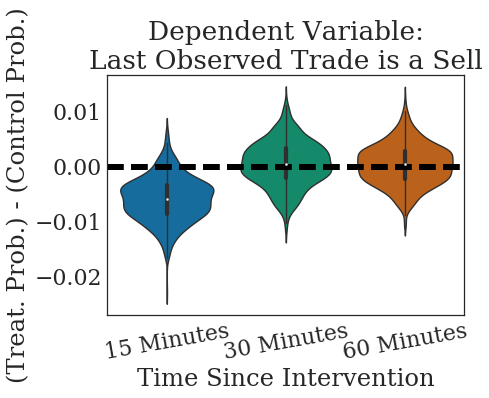

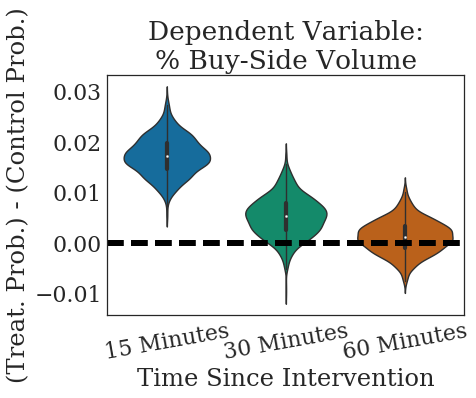

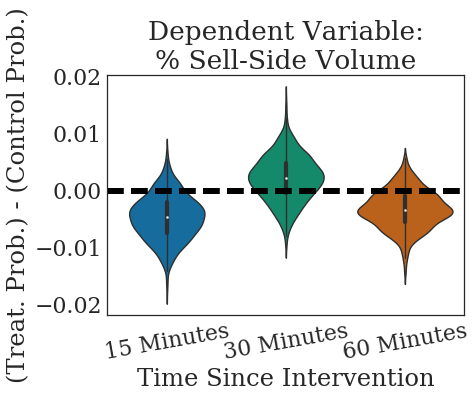

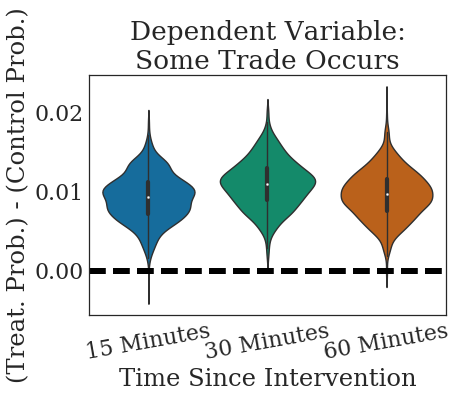

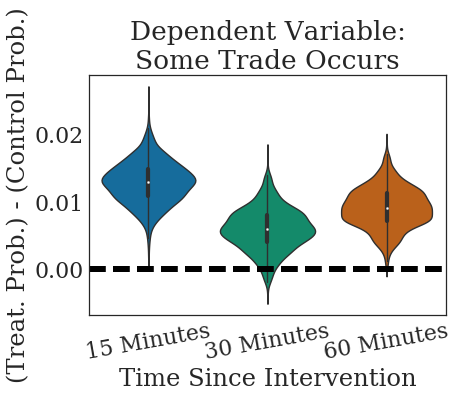

In [42]:

titles = {}
titles['buy'] = {'trade':'Last Observed Trade is a Buy',
                 'perc':'% Buy-Side Volume',
                 'null':'Some Trade Occurs'}
titles['sell'] = {'trade':'Last Observed Trade is a Sell',
                 'perc':'% Sell-Side Volume',
                 'null':'Some Trade Occurs'}

for d in results:
    for a in ['buy','sell']:
        tests.violin(results[d][a], 
                     {1:'15 Minutes',2:'30 Minutes',3:'60 Minutes'}, 
                     'Time Since Intervention',
                     '(Treat. Prob.) - (Control Prob.)', 
                     title = 'Dependent Variable:\n' + titles[a][d], 
                     filebase = d + '-' + a)


In [43]:
tests.run_regressions(checks)

Number of Tests: 18 

\begin{tabular}{|r|r|r|r|r|}

\hline

\textbf{Dep. Var.} & \textbf{Independent Var.} & \textbf{Coef.} & \textbf{$t$-stat} & \textbf{$p$-value}\\

\hline

Buy Prob. & Buy Treat. & 0.016 & 4.47 & 1.4e-04 \\\hline

Buy Prob. & Buy Treat.*Time 2 & -0.016 & -3.02 & 4.48e-02 \\\hline

Buy Prob. & Buy Treat.*Time 3 & -0.015 & -3.15 & 2.92e-02 \\\hline

Buy Prob. & Sell Treat. & 0.004 & 1.01 & 1e+00 \\\hline

Buy Prob. & Sell Treat.*Time 2 & -0.004 & -0.72 & 1e+00 \\\hline

Buy Prob. & Sell Treat.*Time 3 & -0.003 & -0.61 & 1e+00 \\\hline

\% Buy Vol. & Buy Treat. & 0.014 & 4.14 & 6.39e-04 \\\hline

\% Buy Vol. & Buy Treat.*Time 2 & -0.012 & -2.46 & 2.53e-01 \\\hline

\% Buy Vol. & Buy Treat.*Time 3 & -0.015 & -3.3 & 1.75e-02 \\\hline

\% Buy Vol. & Sell Treat. & 0.003 & 0.98 & 1e+00 \\\hline

\% Buy Vol. & Sell Treat.*Time 2 & -0.005 & -1.03 & 1e+00 \\\hline

\% Buy Vol. & Sell Treat.*Time 3 & 0.001 & 0.21 & 1e+00 \\\hline

Trade Prob. & Buy Treat. & 0.006 & 2.28 & 4.05e-

## Peer Influence

In [44]:
tests.get_total_effect_size(checks, interventions)

MAE/MSE ratio: 0.2731724074755038
Buy vs. Control test
MannwhitneyuResult(statistic=1314159055.5, pvalue=1.4199849527428246e-06)
Buy vs. Sell test
MannwhitneyuResult(statistic=1315123469.5, pvalue=0.029872055319698349)

Number of sell-side measurements 51616.0
Number of control measurements 51941.0
Number of buy measurements 51201.0
Difference in number between buy v. control -740.0
Proportional difference between buy v. control -0.01424693402129339
Difference in number between buy v. sell -415.0
Proportional difference between buy v. sell -0.008040142591444513

Mean of sell-side measurements 0.027119937364383166
Mean of control measurements 0.02753994600604542
Mean of buy measurements 0.02955191307181505
Difference in mean between buy v. control 0.0020119670657696292
Proportional difference between buy v. control 0.07305631845930174
Difference in mean between buy v. sell 0.0024319757074318833
Proportional difference between buy v. sell 0.08967482759107757

Sum of sell-side measurement

## Asymmetric Null Effect

In [45]:
tests.get_state_fractions(interventions)

Fraction of buys that increase price: 0.776991960596
Fraction of sell that decrease price: 0.378741675316


## Market Composition

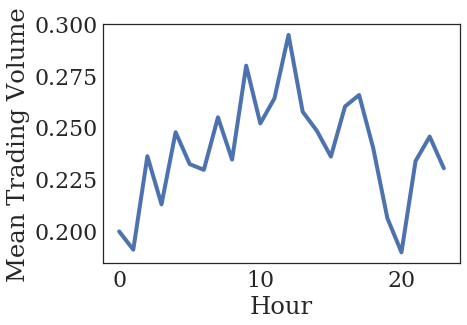

In [46]:
sns.set(context = 'paper', font_scale = 2.75, font='serif', style = 'white',  rc={"lines.linewidth": 4})
plt.plot(checks.loc[(checks['monitor_num'] == 0)].groupby('hour').mean()['total_60'])
plt.xlabel('Hour')
plt.ylabel('Mean Trading Volume')
plt.savefig('hourly-volume.jpg', bbox_inches = 'tight')

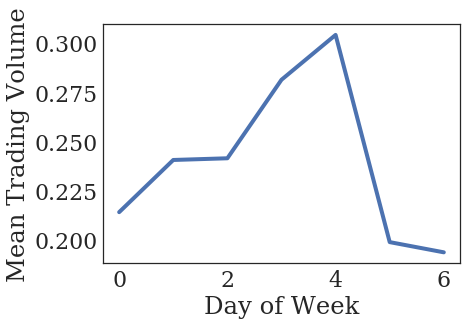

In [47]:
sns.set(context = 'paper', font_scale = 2.75, font='serif', style = 'white',  rc={"lines.linewidth": 4})
plt.plot(checks.loc[(checks['monitor_num'] == 0)].groupby('day_of_week').mean()['total_60'])
plt.xlabel('Day of Week')
plt.ylabel('Mean Trading Volume')
plt.savefig('by-day-volume.jpg', bbox_inches = 'tight')

In [48]:
tests.bot_check(checks)



Call:

lm(formula = recent_last_trade_buy ~ condition * workhours, data = df)



Residuals:

    Min      1Q  Median      3Q     Max 

-0.3022 -0.2965 -0.2838  0.7035  0.7162 



Coefficients:

                         Estimate Std. Error t value Pr(>|t|)    

(Intercept)              0.296551   0.003269  90.722  < 2e-16 ***

conditionsell           -0.012712   0.004607  -2.759  0.00579 ** 

workhours                0.005674   0.006595   0.860  0.38955    

conditionsell:workhours -0.003197   0.009288  -0.344  0.73066    

---

Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Residual standard error: 0.4543 on 51585 degrees of freedom

  (51452 observations deleted due to missingness)

Multiple R-squared:  0.0002377,	Adjusted R-squared:  0.0001796 

F-statistic: 4.089 on 3 and 51585 DF,  p-value: 0.006527





Call:

lm(formula = last.percent.buy.BTC.volume ~ condition * workhours, 

    data = df)



Residuals:

    Min      1Q  Median      3Q     Max 

-0.3177 -0.3